# <font color='#31708f'><center>Preprocessing<a class="anchor" id="second-bullet"></a></center></font>

In [ ]:
pwd   #Display the path of current directory

In [ ]:
import glob

file_list = sorted(glob.glob('/home/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman_lockdown/*.json'))
for filename in file_list:
    print(filename)

In [ ]:
import ijson
def parse_json(json_filename):
        with open(filename, 'r', encoding="utf8") as file:
            # load json iteratively
            parser = ijson.parse(file)
            for prefix, event, value in parser:
                print('prefix={}, event={}, value={}'.format(prefix, event, value))
    
if __name__ == '__main__':
    parse_json(filename)

In [ ]:
import ijson
import re
from string import punctuation
def extract_ticket_text_generator(json_filename):
    """This function takes a list of files with tickets and extracts text from each ticket. The result is a list of text strings."""
    for filename in file_list:
            with open(filename, 'r', encoding="utf8") as input_file:
                # Extract specific items from the file
                tickets = ijson.items(input_file, 'run.executions.item.assertions.item.assertion')
                for ticket in tickets:
                    # Extract the substring between two markers
                    l = re.findall('plain_body(.+?)public', ticket)
                    #Remove escaped newline '\\n' and non-breaking space 'nbsp' characters
                    m = [re.sub(r'\\n|nbsp', ' ', t) for t in l]
                    # Remove any URL within a string
                    p = [re.sub(r'http\S+|www\S+', '', o) for o in m]          
                    # Remove all of the punctuation in any item in the list. The result is for each ticket a list of comments.
                    q = [''.join(c for c in s if c not in punctuation) for s in p]
                    # Join list elements without any separator. The result is for each ticket a list of merged comments.
                    r = [' '.join(q)] 
                    yield(r)
                
    if __name__ == '__main__':
        extract_ticket_text_generator(filename)

In [ ]:
def create_txt_files():
        """This function takes a list of text strings and saves each ticket in a .txt file."""
        data = extract_ticket_text_generator(filename)
        # Make a flat list out of list of lists.
        flat_list = [item for sublist in data for item in sublist]
        for i in range(len(flat_list)):
            with open("ticket_%d.txt" % (i+59047), 'w', encoding="utf-8") as f:
                f.write(flat_list[i])

In [ ]:
create_txt_files()

Outside of project scope - create a .txt file with all tickets in it:

In [ ]:
def create_tickets_all_txt_file():
        """This function takes a list of text strings and saves all tickets in a .txt file."""
        data = extract_ticket_text_generator(filename)
        # Make a flat list out of list of lists.
        flat_list = [item for sublist in data for item in sublist]
        with open('ticket_all_lockdown.txt', 'w', encoding="utf-8") as filehandle:
            #Save all elements of a list as a text file:
            for listitem in flat_list:
                filehandle.write('%s\n\n' % listitem)

In [ ]:
create_tickets_all_txt_file()

Outside of project scope above

# <font color='#31708f'><center>Unigram WordCloud<a class="anchor" id="third-bullet"></a></center></font>

In [1]:
from pathlib import Path
    
all_txt_files =[]
for file in Path("zendesk_txt_lockdown").rglob("*.txt"):
    all_txt_files.append(file.parent / file.name)
    # counts the length of the list
    n_files = len(all_txt_files)
    print(n_files)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [2]:
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file, encoding="utf-8") as f:
        txt_file_as_string = f.read()
        all_docs.append(txt_file_as_string)

# <font color='#576675'>Load the packages:</font>

In [ ]:
import gensim
import spacy

#Wordcloud
from wordcloud import WordCloud, STOPWORDS   
import matplotlib.pyplot as plt   #plotting tools

#word cloud dataframe
import pandas as pd

import nltk
import re

import numpy as np



# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn

%matplotlib inline

In [3]:
import gensim
import spacy

#Wordcloud
from wordcloud import WordCloud, STOPWORDS   
import matplotlib.pyplot as plt   #plotting tools

#word cloud dataframe
import pandas as pd

import nltk
import re

In [ ]:
#from sklearn.feature_extraction.text import pandas as pd

# <font color='#576675'>Tokenize and Clean-up using gensim’s simple_preprocess()</font>

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(all_docs))

print(data_words[:2])

[['event', 'query', 'anthony', 'valente', 'technical', 'support', 'specialist', 'eventsforce', 'solutions', 'ltd', 'uk', 'support', 'us', 'support', 'apac', 'support', 'web', 'hi', 'matt', 'it', 'was', 'great', 'speaking', 'with', 'you', 'earlier', 'as', 'we', 'discussed', 'you', 'should', 'certainly', 'be', 'able', 'to', 'accommodate', 'your', 'event', 'requirements', 'in', 'eventsforce', 'wanted', 'to', 'provide', 'some', 'links', 'to', 'the', 'data', 'security', 'policy', 'and', 'others', 'please', 'see', 'below', 'privacy', 'and', 'security', 'policy', 'service', 'level', 'agreement', 'data', 'security', 'policy', 'eventsforce', 'app', 'licence', 'terms', 'and', 'eventsforce', 'virtual', 'content', 'delivery', 'vcd', 'data', 'security', 'policy', 'securitypolicy', 'please', 'let', 'us', 'know', 'if', 'you', 'have', 'any', 'questions', 'thanks', 'anthony', 'valente', 'technical', 'support', 'specialist', 'eventsforce', 'solutions', 'ltd', 'uk', 'support', 'us', 'support', 'apac', 's

# <font color='#576675'>Lemmatization</font>

In [5]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['event support support support web great speak early discuss should certainly able accommodate event requirement eventsforce want provide link datum security policy other see privacy security policy service level agreement datum security policy licence term eventsforce virtual content delivery datum security policy securitypolicy let know question thank support support support web cheer appreciate time today hopeful solution can use mob email message send individual provide work partnership car trade name use licence car register register registration opinion express email individual necessarily company information message confidential may privileged intend addressee alone intended recipient prohibit disclose use copy information contact sender immediately should message transmit incorrectly email attachment scan presence computer virus partner accept responsibility computer virus email transmit consider environment print email', 'can reset password follow reset password link person u

In [6]:
#Create custom list of English stopwords
custom_stopwords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = custom_stopwords,
                      background_color="white",
                      width = 4000,
                      height = 2000,
                      max_words=200, 
                      collocations = False,   #remove repetitive words
                      min_word_length = 3
                         ).generate(''.join(data_lemmatized))
    
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# write to file
wordcloud.to_file("word_cloud_lockdown_unigrams.png")

# <font color='#31708f'><center>Dataframe from Unigram WordCloud<a class="anchor" id="third-bullet"></a></center></font>

In [ ]:
# generate word count from WordCloud
word_list = WordCloud(stopwords = custom_stopwords,
                      max_words=200, 
                      collocations = False,   #remove repetitive words
                      min_word_length = 3, ).process_text(''.join(data_lemmatized))
word_list

In [ ]:
# sort dictionary by value
sorted_words = sorted(word_list.items(), 
                      key=lambda x: x[1], 
                      reverse=True)
sorted_words[:30]

In [ ]:
dataframe = pd.DataFrame(sorted_words[:33],
                         columns=['words', 'count'])
dataframe

In [ ]:
#drop rows (ticket signature) in pandas dataframe
dataframe.drop([3,5,15]).style.set_properties(subset=['words', 'count'], **{'width': '200px'})

# <font color='#31708f'><center>Top 30 Words in Zendesk Tickets<a class="anchor" id="third-bullet"></a></center></font>

In [ ]:
# plot horizontal bar graph
ax = dataframe.head(33).drop([3,5,15]).sort_values(by='count').plot(kind='barh', 
                                                     figsize=(20,12), 
                                                     x='words', 
                                                     y='count', 
                                                     color="#ccbaba",
                                                     fontsize=16, 
                                                     xlabel="", 
                                                     width=0.75)
#annotate pandas plot bars
for patch in ax.patches:
    ax.text(patch.get_width() + 0.3, 
            patch.get_y() + 0.2,
            " {:,}".format(patch.get_width()), 
            fontsize=12, 
            fontweight='bold')

In [ ]:
#change figure background color and save
fig = ax.get_figure()
fig.patch.set_facecolor('#FFFFFF')
fig.savefig("top_30_unigram.png", facecolor=fig.get_facecolor())

# <font color='#31708f'><center>Bigram WordCloud<a class="anchor" id="third-bullet"></a></center></font>

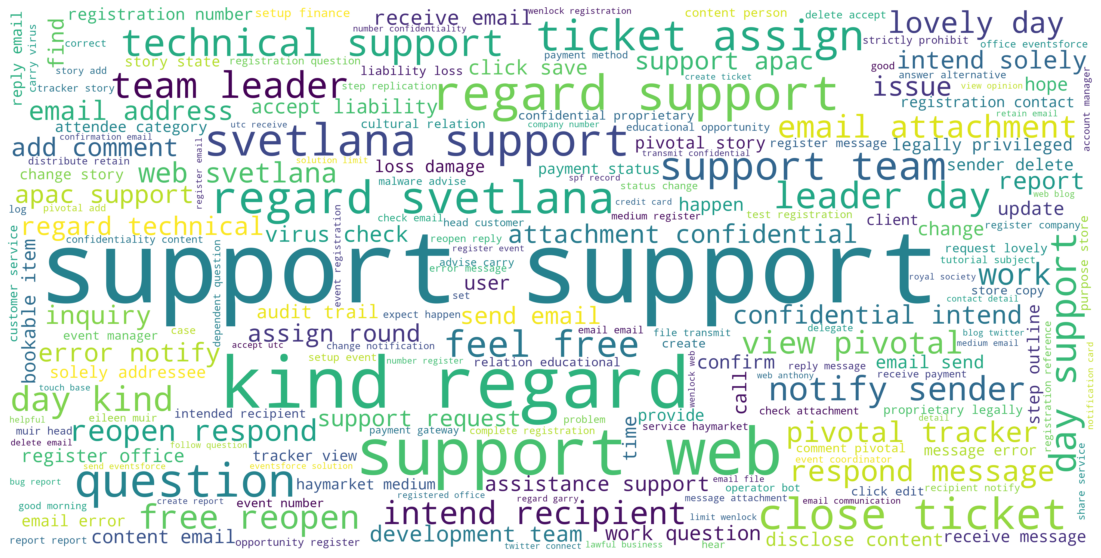

In [10]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = custom_stopwords,
                      background_color="white",
                      width = 4000,
                      height = 2000,
                      max_words=200, 
                      min_word_length = 3, 
                      collocation_threshold = 3   #create wordcloud of bigrams
                         ).generate(''.join(data_lemmatized))

    
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# write to file
wordcloud.to_file("word_cloud_lockdown_unigrams.png")

# <font color='#31708f'><center>Dataframe from Bigram WordCloud<a class="anchor" id="third-bullet"></a></center></font>

In [24]:
#Create custom list of bigram stopwords, custom starting after 'wonder'
bigram_custom_stopwords = custom_stopwords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","kind", "regard", "support", "svetlana", "day", "web", "technical", "garry" ]

In [31]:
#find n-grams
from collections import Counter
from nltk import ngrams
ngram_counts = Counter(ngrams(result.split(), 2))
ngram_counts.most_common(30)

[(('support', 'support'), 5026),
 (('kind', 'regard'), 2116),
 (('support', 'web'), 1752),
 (('let', 'know'), 1419),
 (('regard', 'support'), 851),
 (('question', 'arise'), 839),
 (('regard', 'svetlana'), 731),
 (('svetlana', 'support'), 714),
 (('close', 'ticket'), 673),
 (('ticket', 'assign'), 647),
 (('support', 'team'), 571),
 (('arise', 'kind'), 547),
 (('technical', 'support'), 519),
 (('will', 'close'), 508),
 (('day', 'support'), 490),
 (('team', 'leader'), 486),
 (('leader', 'day'), 486),
 (('feel', 'free'), 481),
 (('ticket', 'now'), 465),
 (('know', 'question'), 439),
 (('day', 'kind'), 420),
 (('now', 'feel'), 410),
 (('free', 'reopen'), 407),
 (('notify', 'sender'), 403),
 (('would', 'like'), 386),
 (('need', 'more'), 373),
 (('intend', 'recipient'), 369),
 (('may', 'contain'), 358),
 (('email', 'attachment'), 357),
 (('more', 'assistance'), 354)]

In [60]:
bigrams = [b for l in data_lemmatized for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigrams[:30]

[('event', 'support'),
 ('support', 'support'),
 ('support', 'support'),
 ('support', 'web'),
 ('web', 'great'),
 ('great', 'speak'),
 ('speak', 'early'),
 ('early', 'discuss'),
 ('discuss', 'should'),
 ('should', 'certainly'),
 ('certainly', 'able'),
 ('able', 'accommodate'),
 ('accommodate', 'event'),
 ('event', 'requirement'),
 ('requirement', 'eventsforce'),
 ('eventsforce', 'want'),
 ('want', 'provide'),
 ('provide', 'link'),
 ('link', 'datum'),
 ('datum', 'security'),
 ('security', 'policy'),
 ('policy', 'other'),
 ('other', 'see'),
 ('see', 'privacy'),
 ('privacy', 'security'),
 ('security', 'policy'),
 ('policy', 'service'),
 ('service', 'level'),
 ('level', 'agreement'),
 ('agreement', 'datum')]

In [75]:
result_set = set(result)
print(result_set)

{('', 'hope can help currently judge event judge can access judge log page judging still open event so part ok team furlough be new system thank ticket assign round sue thank inquiry automatic see inviation email judge create active send judge email log how try access system will look back as soon possible kind regard svetlana support support support web svetlana send email outlook give link here work all access last hour few have issue look forward reply sue sue may provide example name judge experience issue kind regard support support judge email issue sue look event live here tutorial how set live let know work question arise kind regard svetlana support support support web svetlana many thank sort kind regard sue great glad sort will close ticket now feel free reopen respond message should question arise lovely day kind regard support support support web'), ('hope can help currently judge event judge can access judge log page judging still open event so part ok team furlough be ne

In [ ]:
import collections
cnt = collections.Counter()

for toks in splitted:
    cnt.update(nltk.bigrams(toks))

print(cnt.most_common(2))

In [ ]:
# select rows in pandas dataframe
sliced = dataframe.iloc[[1,2,5,7,9,10,16,18,19,20,21,22,24,25,26,31,32,33,34,40,43,44,45,46,48,53,54,57,61,62,64,68,70,71,72,77,85,86,92,102,106,108,109,112,124,126,138,140,141,144,147,149,150,152,154,157,158,163,164,167,168,170,176,196,198], [0,1]]

sliced.style.set_properties(subset=['words', 'count'], **{'width': '200px'})

In [ ]:
new_list = ' '.join(data_lemmatized)
print(new_list)
    

In [ ]:
new_list1 = []
for words in new_list: 
    new_list1.append(i)

In [ ]:
print(new_list1[:2])

In [ ]:
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [ ]:
finder = BigramCollocationFinder.from_words(new_list)
finder.nbest(BigramAssocMeasures.likelihood_ratio,10)

# <font color='#31708f'><center>CountVectorizer<a class="anchor" id="fourth-bullet"></a></center></font>

# <font color='#576675'>Create the Document-Word matrix</font>

In [ ]:
#Convert a collection of text documents to a matrix of token counts
vectorizer=CountVectorizer(analyzer='word',   
                           token_pattern='[a-zA-Z]{3,}', # only non-digit characters > 3
                           stop_words=custom_stopwords,  # remove stop words
                           lowercase=True,               # convert all words to lowercase
                           # min_df=10,                  # minimum reqd occurences of a word
                           # max_features=50000,         # max number of uniq words
                           
                       )
    
# this step generates word counts for the words in your docs 
data_vectorized=vectorizer.fit_transform(data_lemmatized)

6 rows (6 tickets), 54 columns (unique words)

In [ ]:
#check rows(docs) and columns(unique words), minus single character words
#The columns number is raw word frequency
data_vectorized.shape

In [ ]:
(Optional)

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
(Optional)

How many times a word has been used in a ticket

In [ ]:
print(data_vectorized.toarray())

# <font color='#576675'>Count</font>

Get top_n_words:

In [ ]:
#Count column in Excel spreadsheet
np.asarray(data_vectorized.sum(axis=0))

In [ ]:
sum_words = np.asarray(data_vectorized.sum(axis=0))

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words_freq =sorted(words_freq, 
                          key = lambda x: x[1], 
                          reverse=True)
sorted_words_freq[:10]

In [ ]:
dataframe = pd.DataFrame(sorted_words_freq[:200],
                         columns=['words', 'count'])


dataframe.head(201)

dataframe.style.set_properties(subset=['words', 'count'], **{'width': '200px'})

In [ ]:
# select rows in pandas dataframe
sliced = dataframe.iloc[[1,2,5,7,9,10,16,18,19,20,21,22,24,25,26,31,32,33,34,40,43,44,45,46,48,53,54,57,61,62,64,68,70,71,72,77,85,86,92,102,106,108,109,112,124,126,138,140,141,144,147,149,150,152,154,157,158,163,164,167,168,170,176,196,198], [0,1]]

sliced.style.set_properties(subset=['words', 'count'], **{'width': '200px'})

In [ ]:
#create horizontal barplot
ax = sliced.head(10).plot.barh(x='words', y='count')